# Recap of Matplotlib & Working with Real Data

In [1]:
import numpy as np
from matplotlib import pyplot 

In [2]:
x_array = np.arange(5,10)
x_square = x_array**2
x_cube = x_array**3
y_array = np.linspace(0,600,len(x_array))

In [3]:
%matplotlib inline

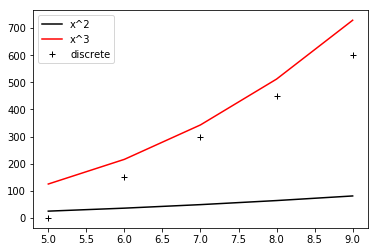

In [4]:
pyplot.plot(x_array,x_square,color='black',label='x^2')
pyplot.plot(x_array,x_cube,color='red',label='x^3')
pyplot.plot(x_array,y_array,'k+',label='discrete')
# pyplot.plot(x_array,y_array,'bo')

pyplot.legend();

# Save plot
pyplot.savefig("day4_am_lesson1_plot1")

### Example Problem:

***Question:*** How would we go about understand the *trend* from the data on global temperature?

### Step 1: Read a Data File

In [5]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'

urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7efbf2afd240>)

In [6]:
?np.loadtxt

In [7]:
# Load file
fname = 'land_global_temperature_anomaly-1880-2016.csv'

# Use numpy.loadtxt to read in the file
year, temp_anomaly = np.loadtxt(fname, delimiter = ',', skiprows = 5, unpack = True)

In [8]:
year[0:5]

array([1880., 1881., 1882., 1883., 1884.])

In [9]:
temp_anomaly[ :5]

array([-0.47, -0.45, -0.41, -0.6 , -0.6 ])

In [10]:
type(temp_anomaly)

numpy.ndarray

### Step 2: Plot the Data

In [11]:
from matplotlib import pyplot
%matplotlib inline

# pyplot is for two dimensional(2D) plots

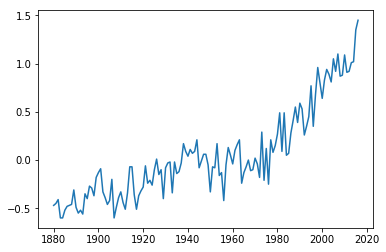

In [12]:
# make a very simple plot with default
pyplot.plot(year, temp_anomaly)

In [13]:
?pyplot.rc

In [14]:
pyplot.rc('font', family = 'serif', size = '12') 
pyplot.rc('lines', lw = 3)

**Color Picker:**

https://www.w3schools.com/colors/colors_picker.asp

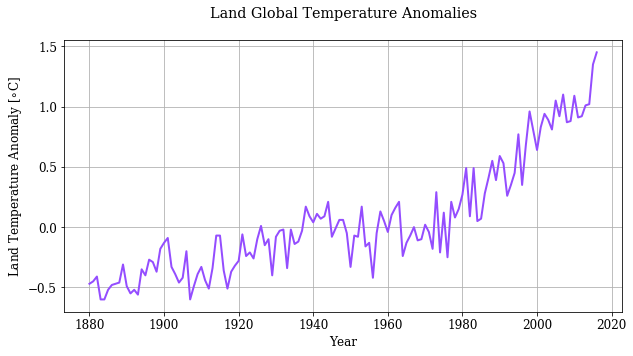

In [15]:
pyplot.figure(figsize = (10, 5))

pyplot.plot(year, temp_anomaly, color = '#944dff', linestyle = '-', linewidth = 2) 
# will overwrite pyplot.rc
pyplot.title('Land Global Temperature Anomalies\n')
pyplot.xlabel('Year')
pyplot.ylabel('Land Temperature Anomaly [$\circ$C]')
pyplot.grid()

**Linear Regression Resource**

http://go.gwu.edu/linearregression

In [16]:
?np.polyfit

In [17]:
a_1n, a_0n = np.polyfit(year, temp_anomaly, 1)

In [18]:
print(a_1n)

0.010370283943472659


In [19]:
print(a_0n)

-20.148685384658457


In [20]:
?np.poly1d

In [21]:
f_linear = np.poly1d((a_1n, a_0n))

In [22]:
print(f_linear)

 
0.01037 x - 20.15


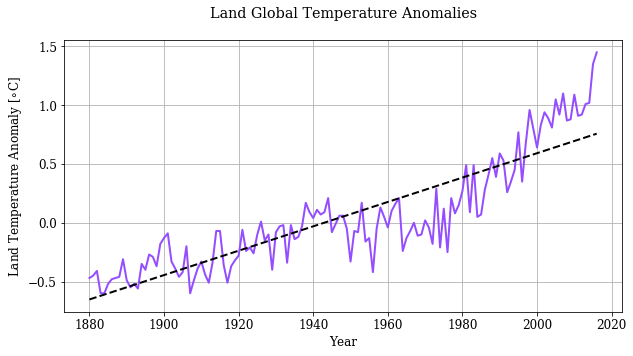

In [23]:
pyplot.figure(figsize = (10, 5))
pyplot.plot(year, temp_anomaly, color = '#944dff', linestyle = '-', linewidth = 2) 

# here is the linear regression
pyplot.plot(year, f_linear(year), 'k--', linewidth = 2, label = 'Linear Regression')

pyplot.title('Land Global Temperature Anomalies\n')
pyplot.xlabel('Year')
pyplot.ylabel('Land Temperature Anomaly [$\circ$C]')
pyplot.grid()

In [24]:
np.where(year == 1970)

(array([90]),)

In [25]:
year[0:3]

array([1880., 1881., 1882.])

In [26]:
year[0:90]

array([1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887., 1888.,
       1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896., 1897.,
       1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905., 1906.,
       1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915.,
       1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924.,
       1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933.,
       1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.,
       1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
       1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.])

In [27]:
year_1, temp_anomaly_1 = year[0:90], temp_anomaly[0:90]
year_2, temp_anomaly_2 = year[90: ], temp_anomaly[90: ]

In [28]:
m1, b1 = np.polyfit(year_1, temp_anomaly_1, 1)
m2, b2 = np.polyfit(year_2, temp_anomaly_2, 1)

In [29]:
f_linear_1 = np.poly1d((m1, b1))
f_linear_2 = np.poly1d((m2, b2))

In [30]:
print(f_linear_1)

 
0.006328 x - 12.38


In [31]:
print(f_linear_2)

 
0.02852 x - 56.29


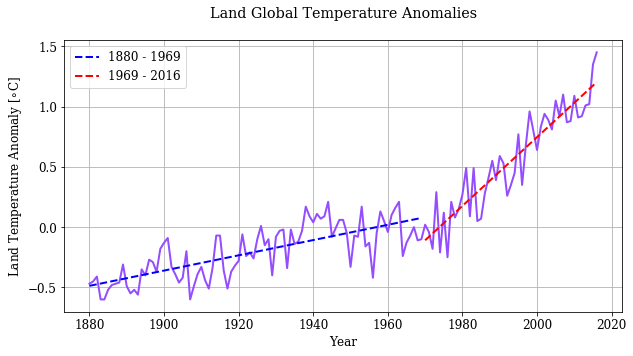

In [32]:
# plot temp graph
pyplot.figure(figsize = (10, 5))
pyplot.plot(year, temp_anomaly, color = '#944dff', linestyle = '-', linewidth = 2) 

# here is the linear regression
pyplot.plot(year_1, f_linear_1(year_1), 'b--', linewidth = 2, label = '1880 - 1969')
pyplot.plot(year_2, f_linear_2(year_2), 'r--', linewidth = 2, label = '1969 - 2016')

pyplot.title('Land Global Temperature Anomalies\n')
pyplot.xlabel('Year')
pyplot.ylabel('Land Temperature Anomaly [$\circ$C]')
pyplot.grid()
pyplot.legend()

In [34]:
max_temp = np.max(temp_anomaly)
print(max_temp)

1.45


In [35]:
min_temp = np.min(temp_anomaly)
print(min_temp)

-0.6


In [36]:
np.where(temp_anomaly == 1.45)

(array([136]),)

In [37]:
year[136]

2016.0

In [39]:
mean_temp_anomaly = np.mean(temp_anomaly)
print(mean_temp_anomaly)

0.05262773722627735


In [40]:
median_temp = np.median(temp_anomaly)
print(median_temp)

-0.05


In [41]:
temp_std = np.std(temp_anomaly)
print(temp_std)

0.46873843744064336
